# Creating Shotcharts in ArcGIS Online Using Python

## This notebook is inteded to guide ArcGIS users on how to automate the process of creating NBA player shotcharts with Python and sharing them into their ArcGIS online accounts fo further visuzlization and analysis.

## Let's look at Russell Westbrook. Here is his stats page on [NBA.com/Stats](http://stats.nba.com/player/#!/201566/gamelogs/)

In [1]:
from IPython.display import IFrame  

In [2]:
url = 'http://stats.nba.com/player/#!/201566/gamelogs/'
IFrame(url, width='100%', height=500)

## Russell Westbrook's Player Number in Stats.NBA.com 

In [3]:
player_id = '201566'

## We're interested in his 2015-2016 regular season statistics

In [4]:
season = '2015-16'

In [5]:
playoffs = False

## We can get his shot data for the 2015-2016 regular season using requests

In [6]:
import requests

In [7]:
master_shots=[]
coords = []
if playoffs:
    seasontype="Playoffs"
else:
    seasontype="Regular%20Season"
seasonindicator=0
nba_call_url='http://stats.nba.com/stats/shotchartdetail?Season=%s&SeasonType=%s&TeamID=0&PlayerID=%s&GameID=&Outcome=&Location=&Month=0&SeasonSegment=&DateFrom=&Dateto=&OpponentTeamID=0&VsConference=&VsDivision=&Position=&RookieYear=&GameSegment=&Period=0&LastNGames=0&ContextMeasure=FGA' % (season,seasontype, player_id)

#Print the URL we're using to get Russell Westbrook's regular season data
print(nba_call_url)

headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10.10; rv:39.0) Gecko/20100101 Firefox/39.0'}
response = requests.get(nba_call_url, headers=headers)
data = response.json()

#Printing out the JSON data
print(data)

http://stats.nba.com/stats/shotchartdetail?Season=2015-16&SeasonType=Regular%20Season&TeamID=0&PlayerID=201566&GameID=&Outcome=&Location=&Month=0&SeasonSegment=&DateFrom=&Dateto=&OpponentTeamID=0&VsConference=&VsDivision=&Position=&RookieYear=&GameSegment=&Period=0&LastNGames=0&ContextMeasure=FGA
{'resultSets': [{'rowSet': [['Shot Chart Detail', '0021500013', 18, 201566, 'Russell Westbrook', 1610612760, 'Oklahoma City Thunder', 1, 10, 10, 'Missed Shot', 'Jump Shot', '3PT Field Goal', 'Above the Break 3', 'Center(C)', '24+ ft.', 25, -47, 247, 1, 0], ['Shot Chart Detail', '0021500013', 23, 201566, 'Russell Westbrook', 1610612760, 'Oklahoma City Thunder', 1, 9, 45, 'Made Shot', 'Turnaround Jump Shot', '2PT Field Goal', 'In The Paint (Non-RA)', 'Left Side(L)', '8-16 ft.', 11, -58, 97, 1, 1], ['Shot Chart Detail', '0021500013', 26, 201566, 'Russell Westbrook', 1610612760, 'Oklahoma City Thunder', 1, 9, 17, 'Missed Shot', 'Jump Shot', '3PT Field Goal', 'Above the Break 3', 'Left Side Center(

## Let's look at the data with Pandas. We see that there is a set of column headers that define data and a row set that contains the statistics.

In [8]:
import pandas as pd

In [9]:
shots = data['resultSets'][0]['rowSet']
column_headers = data['resultSets'][0]['headers']
print(shots)

[['Shot Chart Detail', '0021500013', 18, 201566, 'Russell Westbrook', 1610612760, 'Oklahoma City Thunder', 1, 10, 10, 'Missed Shot', 'Jump Shot', '3PT Field Goal', 'Above the Break 3', 'Center(C)', '24+ ft.', 25, -47, 247, 1, 0], ['Shot Chart Detail', '0021500013', 23, 201566, 'Russell Westbrook', 1610612760, 'Oklahoma City Thunder', 1, 9, 45, 'Made Shot', 'Turnaround Jump Shot', '2PT Field Goal', 'In The Paint (Non-RA)', 'Left Side(L)', '8-16 ft.', 11, -58, 97, 1, 1], ['Shot Chart Detail', '0021500013', 26, 201566, 'Russell Westbrook', 1610612760, 'Oklahoma City Thunder', 1, 9, 17, 'Missed Shot', 'Jump Shot', '3PT Field Goal', 'Above the Break 3', 'Left Side Center(LC)', '24+ ft.', 24, -181, 169, 1, 0], ['Shot Chart Detail', '0021500013', 58, 201566, 'Russell Westbrook', 1610612760, 'Oklahoma City Thunder', 1, 6, 37, 'Missed Shot', 'Driving Layup Shot', '2PT Field Goal', 'Restricted Area', 'Center(C)', 'Less Than 8 ft.', 2, 15, 16, 1, 0], ['Shot Chart Detail', '0021500013', 60, 201566

In [10]:
shots_df = pd.DataFrame(shots, columns=column_headers)
shots_df.head()

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG
0,Shot Chart Detail,0021500013,18,201566,Russell Westbrook,1610612760,Oklahoma City Thunder,1,10,10,...,Jump Shot,3PT Field Goal,Above the Break 3,Center(C),24+ ft.,25,-47,247,1,0
1,Shot Chart Detail,0021500013,23,201566,Russell Westbrook,1610612760,Oklahoma City Thunder,1,9,45,...,Turnaround Jump Shot,2PT Field Goal,In The Paint (Non-RA),Left Side(L),8-16 ft.,11,-58,97,1,1
2,Shot Chart Detail,0021500013,26,201566,Russell Westbrook,1610612760,Oklahoma City Thunder,1,9,17,...,Jump Shot,3PT Field Goal,Above the Break 3,Left Side Center(LC),24+ ft.,24,-181,169,1,0
3,Shot Chart Detail,0021500013,58,201566,Russell Westbrook,1610612760,Oklahoma City Thunder,1,6,37,...,Driving Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,2,15,16,1,0
4,Shot Chart Detail,0021500013,60,201566,Russell Westbrook,1610612760,Oklahoma City Thunder,1,6,29,...,Pullup Jump shot,3PT Field Goal,Above the Break 3,Left Side Center(LC),24+ ft.,25,-117,223,1,1


## Let's write the shots to a feature class

Here, we write the shot data to a feature class in a geodatabase. We need to import os to work with files on our operating system, datetime, becuase we're going to create a 'fake' game-time string, and arcpy becuase we are going to create a feature class from the shot locations.

In [11]:
import os
import datetime
import arcpy

In [12]:
#Array to store coordinates and other shot attributes
coords = []

In [13]:
#Iterating over all shots in 'resultSets'
for row in data['resultSets'][0]['rowSet']:
    three=0
    if row[12]=='3PT Field Goal':
        three=1
    temp=(row[0], row[1], row[2], row[3], row[4], row[5], 
          row[6], row[7],row[8], row[9], row[10],row[11], 
          row[12], row[13], row[14],row[15], row[16], 
          row[17], row[18], row[19], row[20], three, season[:4], datetime.datetime(int(season[:4])+1, 1, 1))

    coord = ([-row[17],row[18]])
    
    #Add coordinates and attrributes to the coods tuple
    coords.append((coord,)+temp)

In [14]:
#Defining the output feature class
output_feature_class = 'C:/PROJECTS/R&D/NBA/OKC_USER_GROUP/PythonAPI_Test.gdb/Russell_Westbrook_2015_16'

feature_class = os.path.basename(output_feature_class)
print(feature_class)
output_gdb = os.path.dirname(output_feature_class)
print(output_gdb)

#If the geodatabase does not exist, create it
if not arcpy.Exists(output_gdb):
    arcpy.CreateFileGDB_management(os.path.dirname(output_gdb),os.path.basename(output_gdb))

#If fields don't exist in the geodatabase, add them
if not arcpy.Exists(output_feature_class): 
    arcpy.CreateFeatureclass_management(output_gdb, feature_class, "POINT", "#", "DISABLED","DISABLED", arcpy.SpatialReference(3857))
    arcpy.AddField_management(output_feature_class, "GRID_TYPE","TEXT", "", "", 100)
    arcpy.AddField_management(output_feature_class, "GAME_ID","TEXT", "", "", 100)
    arcpy.AddField_management(output_feature_class, "GAME_EVENT_ID","TEXT", "", "", 100)
    arcpy.AddField_management(output_feature_class, "PLAYER_ID","TEXT", "", "", 100)
    arcpy.AddField_management(output_feature_class, "PLAYER_NAME","TEXT", "", "", 100)
    arcpy.AddField_management(output_feature_class, "TEAM_ID","TEXT", "", "", 100)
    arcpy.AddField_management(output_feature_class, "TEAM_NAME","TEXT", "", "", 100)
    arcpy.AddField_management(output_feature_class,"PERIOD","SHORT", "", "", "")
    arcpy.AddField_management(output_feature_class,"MINUTES_REMAINING","SHORT", "", "", "")
    arcpy.AddField_management(output_feature_class,"SECONDS_REMAINING","SHORT", "", "", "")
    arcpy.AddField_management(output_feature_class,"EVENT_TYPE","TEXT", "", "", 100)
    arcpy.AddField_management(output_feature_class,"ACTION_TYPE","TEXT", "", "", 100)
    arcpy.AddField_management(output_feature_class,"SHOT_TYPE","TEXT", "", "", 100)
    arcpy.AddField_management(output_feature_class,"SHOT_ZONE_BASIC","TEXT", "", "", 100)
    arcpy.AddField_management(output_feature_class,"SHOT_ZONE_AREA","TEXT", "", "", 100)
    arcpy.AddField_management(output_feature_class,"SHOT_ZONE_RANGE","TEXT", "", "", 100)
    arcpy.AddField_management(output_feature_class,"SHOT_DISTANCE","SHORT", "", "", "")
    arcpy.AddField_management(output_feature_class,"LONGITUDE","DOUBLE", "", "", "")
    arcpy.AddField_management(output_feature_class,"LATITUDE","DOUBLE", "", "", "")
    arcpy.AddField_management(output_feature_class,"SHOT_ATTEMPTED_FLAG","SHORT", "", "", "")
    arcpy.AddField_management(output_feature_class,"SHOT_MADE_FLAG","SHORT", "", "", "")
    arcpy.AddField_management(output_feature_class,"THREE","SHORT", "", "", "")
    arcpy.AddField_management(output_feature_class,"GAME_DATE", "TEXT", "", "", 30)
    arcpy.AddField_management(output_feature_class,"SEASON_DATE", "DATE")

Russell_Westbrook_2015_16
C:/PROJECTS/R&D/NBA/OKC_USER_GROUP/PythonAPI_Test.gdb


In [15]:
#Defining the fields that we want in the output feature class
fc_fields = ("SHAPE@XY","GRID_TYPE","GAME_ID","GAME_EVENT_ID","PLAYER_ID","PLAYER_NAME","TEAM_ID",
    "TEAM_NAME","PERIOD","MINUTES_REMAINING","SECONDS_REMAINING","EVENT_TYPE",
    "ACTION_TYPE","SHOT_TYPE","SHOT_ZONE_BASIC","SHOT_ZONE_AREA",
    "SHOT_ZONE_RANGE","SHOT_DISTANCE","LONGITUDE","LATITUDE","SHOT_ATTEMPTED_FLAG",
    "SHOT_MADE_FLAG", "THREE", "GAME_DATE", "SEASON_DATE")

In [16]:
#Insert shot data into feature class
c = arcpy.da.InsertCursor(output_feature_class,fc_fields)
for row in coords:
    print(row)
    c.insertRow(row)
del c

([47, 247], 'Shot Chart Detail', '0021500013', 18, 201566, 'Russell Westbrook', 1610612760, 'Oklahoma City Thunder', 1, 10, 10, 'Missed Shot', 'Jump Shot', '3PT Field Goal', 'Above the Break 3', 'Center(C)', '24+ ft.', 25, -47, 247, 1, 0, 1, '2015', datetime.datetime(2016, 1, 1, 0, 0))
([58, 97], 'Shot Chart Detail', '0021500013', 23, 201566, 'Russell Westbrook', 1610612760, 'Oklahoma City Thunder', 1, 9, 45, 'Made Shot', 'Turnaround Jump Shot', '2PT Field Goal', 'In The Paint (Non-RA)', 'Left Side(L)', '8-16 ft.', 11, -58, 97, 1, 1, 0, '2015', datetime.datetime(2016, 1, 1, 0, 0))
([181, 169], 'Shot Chart Detail', '0021500013', 26, 201566, 'Russell Westbrook', 1610612760, 'Oklahoma City Thunder', 1, 9, 17, 'Missed Shot', 'Jump Shot', '3PT Field Goal', 'Above the Break 3', 'Left Side Center(LC)', '24+ ft.', 24, -181, 169, 1, 0, 1, '2015', datetime.datetime(2016, 1, 1, 0, 0))
([-15, 16], 'Shot Chart Detail', '0021500013', 58, 201566, 'Russell Westbrook', 1610612760, 'Oklahoma City Thunde

## In order to upload the data to ArcGISOnline, we need to zip the GDB

In [17]:
from shutil import make_archive

In [18]:
layer_name = 'Russell_Westbrook_2015_16'
archive_name = os.path.join(os.path.dirname(output_gdb),layer_name)
archive = make_archive(archive_name, 'zip', os.path.dirname(output_gdb), os.path.basename(output_gdb))
print(archive)

C:\PROJECTS\R&D\NBA\OKC_USER_GROUP\Russell_Westbrook_2015_16.zip


## Once the GDB is zipped, we publish it as a hosted feature service with Python API

In [1]:
from arcgis.gis import GIS
from arcgis.lyr import FeatureCollection
from IPython.display import display

In [2]:
gis = GIS("https://ps-dbs.maps.arcgis.com", "gregbrunner_dbs", "****")

### Let's publish it!

In [21]:
service = gis.content.add({}, archive)

In [22]:
shots_service = service.publish()

### Here it is in ArcGIS Online

In [3]:
shots_layer = gis.content.search("Russell_Westbrook_2015_16", "feature service")
shots_layer

[<Item title:"Russell_Westbrook_2015_16" type:Feature Service owner:gregbrunner_dbs>]

In [4]:
shots_layer[0]

<Item title:"Russell_Westbrook_2015_16" type:Feature Service owner:gregbrunner_dbs>

## Finally, let's display the shots in a webmap with the Python API

In [5]:
map = gis.map((0,0), 17)

In [6]:
map

In [7]:
map = map.add_layer(shots_layer[0])

### Let's find one of my basketball court basemaps

In [8]:
court_tiles = gis.content.search('basketball court')
court_tiles

[<Item title:"OKC_Thunder_Basketball_Court" type:Map Service owner:gregbrunner_dbs>,
 <Item title:"Slate_BaseketballCourt" type:Map Service owner:gregbrunner_dbs>,
 <Item title:"Basketball_Court" type:Feature Service owner:gregbrunner_dbs>,
 <Item title:"OKC_Court" type:Map Service owner:gregbrunner_dbs>,
 <Item title:"Kevin Durant's Regular Season Career" type:Web Map owner:gregbrunner_dbs>,
 <Item title:"Basketball Court - OKC" type:Web Map owner:gregbrunner_dbs>,
 <Item title:"Basketball Court - Slate" type:Web Map owner:gregbrunner_dbs>,
 <Item title:"Basketball Court - Grey" type:Web Map owner:gregbrunner_dbs>,
 <Item title:"Basketball Court - Black and Orange" type:Web Map owner:gregbrunner_dbs>,
 <Item title:"Basketball Court - Black" type:Web Map owner:gregbrunner_dbs>]

<Item title:"Basketball Court - Slate" type:Web Map owner:gregbrunner_dbs>
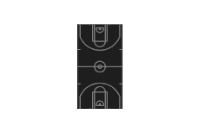

In [9]:
court_tiles[6]

### Adding the court tiles to the map view 

In [10]:
from arcgis.viz import MapView
court = MapView(item=court_tiles[6])

In [11]:
court

### Last, we add the shots to the webmap!

In [12]:
court.add_layer(shots_layer[0])

### Can you dig it!

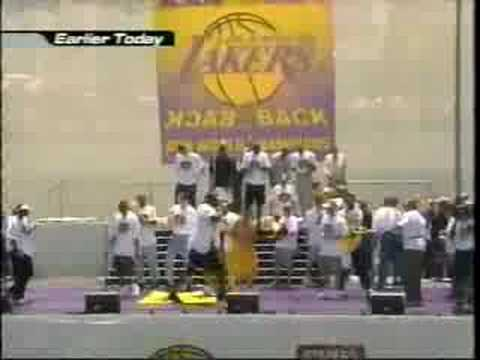

In [33]:
from IPython.display import YouTubeVideo
YouTubeVideo('_1ciMXvSE8U')

### Oops, wrong link! Try this one:

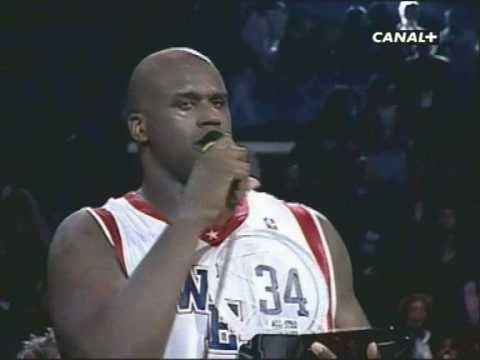

In [34]:
YouTubeVideo('UMRvl4Glyz4')